### Projet IGL3/IDS3 : Analyse Numérique Matricielle dans le cadre de la gestion de bases de données bibliographiques 

In [ ]:
import numpy as np
from fuzzywuzzy import fuzz
import matplotlib.pyplot as plt

In [ ]:
# 1ère Partie : Calcul de score de document : Sans utilisation de la décomposition SVD
# Modèle de l'espace vectoriel

def matrice_termes_documents(termes, documents):
    """
      Cette méthode permet de construire la matrice termes-documents.
    """
    matrice = np.zeros((len(termes), len(documents)), dtype=int)

    termes_sorted = sorted(termes)
    termes_sorted = [terme.lower() for terme in termes_sorted]

    documents_termes = []

    for doc in documents :
        if isinstance(doc, str) :
            termes_doc = doc.lower().split()
        else :
            termes_doc = doc

        documents_termes.append(termes_doc)

    for i , terme in enumerate(termes_sorted) :
        for j, doc_termes in enumerate(documents_termes) :
            if terme in doc_termes :
                matrice[i][j] = 1

    return matrice 

In [ ]:
def afficher_matrice(matrice) :
    """
      Cette méthode permet d'afficher la matrice termes-documents.
    """
    for i in range(matrice.shape[0]) :
        for j in range(matrice.shape[1]) :
            print(matrice[i][j], end = " ")
        print()

In [ ]:
#Test de la méthode : 
# Génération de la matrice termes-documents (Exemple 1)
documents = [
    "Algèbre linéaire et matrices",
    "Analyse réele et suites",
    "Probabilités et statistiques",
    "Matrices et déterminants"
]

termes = [
    "algèbre",
    "matrices",
    "analyse",
    "suites",
    "probabilités",
    "statistiques",
    "déterminants"
]


matrice = matrice_termes_documents(termes, documents)
afficher_matrice(matrice)

In [ ]:


def requete_vers_colonne(termes, requete):
    vecteur = [0] * len(termes) 
    termes_sorted = sorted(termes)
    mots_requete = requete.lower().split()
    
    for i, terme in enumerate(termes_sorted):
        for mot in mots_requete:
            if fuzz.ratio(terme.lower(), mot) >= 90:
                vecteur[i] = 1  
                break  
    
    return vecteur


In [ ]:
#Test de la méthode :
requete = "Algèbre matrice"
vecteur_colonne = requete_vers_colonne(termes, requete)
vecteur_colonne

In [ ]:
def score_document(j , matrice , q):
    """
      Cette méthode permet de calculer le score d'un document j par rapport à une requête q.
    """
    vect_doc = matrice[:, j]
    norme_req = np.linalg.norm(q)
    if norme_req == 0:
        return 0
    
    norme_doc = np.linalg.norm(vect_doc)
    if norme_doc == 0:
        return 0
    
    produit_scalaire = np.dot(vect_doc, q)

    score =  float(produit_scalaire / (norme_doc * norme_req))
    return round(score, 2)

In [ ]:
# Affichage des scores de documents : 
def tab_score(matrice , q):
    """
      Cette méthode permet de calculer le score de chaque document par rapport à la requête q.
    """
    scores = []
    for j in range(matrice.shape[1]):
        score = score_document(j, matrice, q)
        scores.append(score)
    return scores

In [ ]:
def resultat_requete(matrice, q , score_min = 0.8):
    """
    Cette méthode permet d'afficher le score de chaque document par rapport à la requête q
    et détermine le document le plus pertinent.
    """
    scores = tab_score(matrice, q)
    
    for i, score in enumerate(scores):
        print(f"Document {i+1} : {score}")
    
    if len(scores) > 0 and max(scores) > score_min :
        indice_max = scores.index(max(scores))
        print(f"\nLe document le plus pertinent est le Document {indice_max+1} avec un score de {scores[indice_max]}")
    else:
        print("\nAucun document disponible pour évaluation")

In [ ]:
#Test des méthodes (Sans utilisation de la décomposition SVD) :
# Exemple 1 : 

requete = "Algèbre matrice"
vecteur_colonne = requete_vers_colonne(termes, requete)

print("---------------AFFICHAGE DE LA MATRICE---------------\n")
matrice = matrice_termes_documents(termes, documents)
afficher_matrice(matrice)
print("\n---------------TRAVAIL DE LA REQUETE---------------\n")
# Affichage des scores de documents :
resultat_requete(matrice, vecteur_colonne, score_min = 0.8)


In [ ]:
# Avant le test de l'exemple 3 : Génération de la matrice termes-documents (Exemple 3)
documents_exemple_3 = [
    "Croissance PIB Investissement",
    "Inflation Monnaie Dépression",
    "Commerce Exportation Croissance",
    "Emploi Chômage Salaire",
    "Impôts Fiscalité Budget",
    "Géologie Faille Tremblement",
    "Volcan Séisme Plaque tectonique",
    "Dépression Bassin Erosion",
    "Stratigraphie Couches Roche",
    "Gisement Forage Bassin"
]

termes_exemple_3 = [
    "Bassin",
    "Chômage",
    "Croissance",
    "Dépression",
    "Fiscalité",
    "Séisme"
]

matrice_exemple_3 = matrice_termes_documents(termes_exemple_3, documents_exemple_3)
afficher_matrice(matrice_exemple_3)

In [ ]:
# Exemple 3 (REQUERTES) :
requete_exemple_3_1 = "dépression croissance"
requete_exemple_3_2 = "bassin fiscalité"

In [ ]:
#Test de la méthode (EXEMPLE 3) :
vecteur_colonne_exemple_3_1 = requete_vers_colonne(termes_exemple_3, requete_exemple_3_1)
vecteur_colonne_exemple_3_2 = requete_vers_colonne(termes_exemple_3, requete_exemple_3_2)

print("\n---------------TRAVAIL DE LA REQUETE 1---------------\n")
resultat_requete(matrice_exemple_3, vecteur_colonne_exemple_3_1, score_min = 0.8)


In [ ]:
print("\n---------------TRAVAIL DE LA REQUETE 2---------------\n")
resultat_requete(matrice_exemple_3, vecteur_colonne_exemple_3_1, score_min = 0.8)

#### 2) Décomposition en valeurs singulières d'une matrice (SVD)

In [ ]:
#Application de la décomposition SVD (méthode prédéfinie) :
def decomposition_SVD(matrice):
    """
      Cette méthode permet de calculer la décomposition SVD de la matrice.
    """
    U, S, Vt = np.linalg.svd(matrice, full_matrices=False)
    return U, S, Vt

In [ ]:
#Test de la méthode :
U , S , Vt = decomposition_SVD(matrice)
print("\n---------------DECOMPOSITION SVD---------------\n")
print("Matrice U :\n", U)
print("\nMatrice S :\n", S)
print("\nMatrice Vt :\n", Vt)


In [ ]:
def approximation_SVD(matrice, k):
    """
      Cette méthode permet de calculer l'approximation SVD de la matrice.
    """
    U, S, Vt = decomposition_SVD(matrice)
    S_k = np.zeros((U.shape[0], Vt.shape[0]))
    np.fill_diagonal(S_k, S[:k])
    return U[:, :k], S_k[:k, :k], Vt[:k, :]

In [ ]:
#Test de la méthode :
app_U , app_S , app_Vt = approximation_SVD(matrice, 3)
print("\n---------------APPROXIMATION SVD : TEST RESULTAS---------------\n")
matrice.shape ,app_U.shape, app_S.shape, app_Vt.shape

In [ ]:
#Fonction de calcul du score de document avec SVD (SCORE DE PERTINENCE) :
def score_pertinence(q , j , U_k , Sk , V_tk ):
    """
      Cette méthode permet de calculer le score de pertinence d'un document j par rapport à une requête q
      en utilisant la décomposition SVD.

      PARAMETRES (ENTRÉES) :
        - q : vecteur colonne de la requête
        - matrice : matrice termes-documents (ORIGINALE) (n,m)
        - j : indice du document
        - U_k : matrice U de la décomposition SVD (approximation par k) : shape (n,k)
        - Sk : matrice S de la décomposition SVD (approximation par k) : shape (k,k)
        - V_tk : matrice Vt (transposé) de la décomposition SVD (approximation par k) : shape (k,m)
    """
    # transposition de la matrice U_k
    U_k_transpose = U_k.T
    prod_1 = U_k_transpose @ q # produit de la matrice U_k transposée et du vecteur colonne q
    prod_2 = Sk @ V_tk[: , j] # produit de la matrice S_k et de la matrice Vt_k et du vecteur colonne du document j

    dominateur = np.linalg.norm(prod_1) * np.linalg.norm(prod_2) # produit des normes
    if dominateur == 0:
        return 0
    
    score = float(np.dot(prod_1, prod_2) / dominateur) # produit scalaire entre les deux produits
    return round(score, 2) # arrondi à 2 chiffres après la virgule
   

In [ ]:
# calcul scores de documents : 
def tab_score_pertinence(q , matrice , U_k , Sk , V_tk):
    """
      Cette méthode permet de calculer le score de chaque document par rapport à la requête q.
    """
    scores = []
    for j in range(matrice.shape[1]):
        score = score_pertinence(q  , j , U_k , Sk , V_tk)
        scores.append(score)
    return scores

In [ ]:
def resultat_requete_pertinence(q , matrice , U_k , Sk , V_tk, score_min = 0.8):
    """
    Cette méthode permet d'afficher le score de chaque document par rapport à la requête q
    et détermine le document le plus pertinent.
    """
    scores = tab_score_pertinence(q , matrice , U_k , Sk , V_tk)
    
    for i, score in enumerate(scores):
        print(f"Document {i+1} : {score}")
    
    if len(scores) > 0 and max(scores) > score_min :
        indice_max = scores.index(max(scores))
        print(f"\nLe document le plus pertinent est le Document {indice_max+1} avec un score de {scores[indice_max]}")
    else:
        print("\nAucun document disponible pour évaluation")

In [ ]:
#méthode illustrative de (Décomposition en valeurs singulières d'une matrice (SVD))
def requete_SVD(matrice , k , q) : 
    U_k , Sk , V_tk = approximation_SVD(matrice, k)
    resultat_requete_pertinence(q , matrice , U_k , Sk , V_tk , 0.8)
    

In [ ]:
#Test de la méthode : score_pertinence
requete = "Algèbre matrice"
vecteur_colonne = requete_vers_colonne(termes, requete)
print("---------------AFFICHAGE DE LA MATRICE---------------\n")
matrice = matrice_termes_documents(termes, documents)
afficher_matrice(matrice)
print("\n-------------TRAITEMENT---------------\n")
requete_SVD(matrice , 4 , vecteur_colonne)


In [ ]:
#EXEMPLE 3 (REQUERTES DEJA PREPARES) :
print("\n---------------TRAVAIL DE LA REQUETE 1---------------\n")
requete_SVD(matrice_exemple_3 , 6 , vecteur_colonne_exemple_3_1)

In [ ]:
#EXEMPLE 3 (REQUERTES DEJA PREPARES) :
print("\n---------------TRAVAIL DE LA REQUETE 2---------------\n")
requete_SVD(matrice_exemple_3 , 6 , vecteur_colonne_exemple_3_2)

##### Accélération des calculs : Bidiagonalisation et méthode QR 

In [ ]:
def bidiagonale(A):
    A = np.asarray(A)
    m, n = A.shape
    
    p = min(m, n) 
    alpha = np.zeros(p)
    beta = np.zeros(max(0, p-1)) 
    
    U = np.zeros((m, p))
    V = np.zeros((n, p))
    
    u = np.random.randn(m)
    u = u / np.linalg.norm(u)
    U[:, 0] = u
    
    for i in range(p):
        v = A.T @ U[:, i]
        if i > 0:
            v = v - beta[i-1] * V[:, i-1]
        alpha[i] = np.linalg.norm(v)
        V[:, i] = v / alpha[i]
        
        if i < p-1:
            u = A @ V[:, i]
            u = u - alpha[i] * U[:, i]
            beta[i] = np.linalg.norm(u)
            U[:, i+1] = u / beta[i]
    
    B = np.zeros((p, p))
    np.fill_diagonal(B, alpha)
    if p > 1:
        np.fill_diagonal(B[1:, :-1], beta)
    
    return U, B, V
    

In [ ]:
#Test de la méthode de Bidiagonalisation :
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
U, B, V = bidiagonale(A)



print('Original matrix:')
print(A)
print('\nReconstructed matrix (U @ B @ V^T):')
print(U @ B @ V.T)
print('\nCheck norm of difference:', np.linalg.norm(A - U @ B @ V.T))

In [ ]:
#Test des propriétés de la matrice bidiagonale :
print(B.shape)
B

In [ ]:
def qr_decomposition(A):
    n , m = A.shape
    Q = np.zeros((n, m))
    R = np.zeros((m, m))

    for j in range(m):
        v = A[:, j]
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], A[:, j])
            v -= R[i, j] * Q[:, i]
        R[j, j] = np.linalg.norm(v)
        Q[:, j] = v / R[j, j]
    return Q, R

In [ ]:
#test de la méthode qr_decomposition
A = np.array([[1, -1, 4], [1, 4, -2], [1, 4, 2], [1, -1, 0]], dtype=float)  # Ensure A is of type float
Q, R = qr_decomposition(A)
print("Q:", Q)
print("R:", R)

In [ ]:
def qr_bidiagonal(B, U_bidiag, V_bidiag, max_iter=1000, tol=1e-10):
    """
    Cette méthode permet de calculer la décomposition SVD d'une matrice bidiagonale B
    en partant des matrices U_bidiag et V_bidiag issues de la bidiagonalisation.
    
    Retourne les matrices U, Sk, V_t telles que A = U @ Sk @ V_t
    """
    m, n = B.shape
    p = min(m, n)
    Bk = B.copy()
    
    # Initialiser U et V avec les matrices de la bidiagonalisation
    U = U_bidiag.copy()
    V = V_bidiag.copy()
    
    for k in range(max_iter):
        # Calculer la décomposition QR de Bk
        Q_k, R_k = qr_decomposition(Bk)
        
        # Mettre à jour U en multipliant par Q_k
        U = U @ Q_k
        
        # Calculer la décomposition QR de R_k transposée
        Q_tilde, B_k1 = qr_decomposition(R_k.T)
        
        # Mettre à jour V en multipliant par Q_tilde
        V = V @ Q_tilde
        
        # Vérifier la convergence
        diag = np.diag(B_k1)
        off_diag = np.diag(B_k1, k=1) if p > 1 else np.array([])
        
        if np.all(np.abs(off_diag) < tol * np.abs(diag[:-1])):
            break
            
        Bk = B_k1.T
    
    # Extraire les valeurs singulières et créer la matrice diagonale Sk
    singular_values = np.abs(np.diag(Bk))
    Sk = np.zeros((m, n))
    for i in range(p):
        Sk[i, i] = singular_values[i]
    
    # Retourner les matrices U, Sk et V_t
    return U, Sk, V.T

In [ ]:
# Matrice de test
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])

# Étape 1: Bidiagonalisation
U, B, V = bidiagonale(A)
print("Matrice bidiagonale B:\n", B)

# Étape 2: Algorithme QR pour B
U_test, Sk, V_t_test = qr_bidiagonal(B, U, V)
print("\nValeurs singulières calculées:", np.diag(Sk))

# Comparaison avec la SVD de NumPy
U_numpy, s_numpy, Vt_numpy = np.linalg.svd(A, full_matrices=False)
print("\nValeurs singulières NumPy:", s_numpy)

# Afficher l'erreur relative
error = np.linalg.norm(np.diag(Sk) - s_numpy) / np.linalg.norm(s_numpy)
print("\nErreur relative:", error)

# Vérifier que A ≈ U_test @ Sk @ V_t_test
A_reconstitue = U_test @ Sk @ V_t_test
print("\nErreur de reconstitution:", np.linalg.norm(A - A_reconstitue) / np.linalg.norm(A))

# Comparer les produits
print("\nMatrice originale A:\n", A)
print("\nMatrice reconstruite U_test @ Sk @ V_t_test:\n", A_reconstitue)

In [ ]:
def approximation_k (k , U_k , Sk , V_tk) :
    return U_k[:, :k], Sk[:k, :k], V_tk[:k, :]

In [ ]:
def requete_qr_bidiagonale(matrice ,k , q) : 

    U , B , V = bidiagonale(matrice)
    U_bdiag , S_bdiag , V_tbdiag = qr_bidiagonal(B , U ,V)
    U_k , Sk , V_tk = approximation_k(k , U_bdiag , S_bdiag , V_tbdiag)
    resultat_requete_pertinence(q , matrice , U_k , Sk , V_tk , 0.8)

In [ ]:
# EXEMPLE 1 :
requete = "Algèbre matrice"
vecteur_colonne = requete_vers_colonne(termes, requete)
print("---------------AFFICHAGE DE LA MATRICE---------------\n")
matrice = matrice_termes_documents(termes, documents)
afficher_matrice(matrice)
print("\n-------------TRAITEMENT---------------\n")
requete_qr_bidiagonale(matrice, 4, vecteur_colonne)


In [ ]:
#EXEMPLE 3 (REQUERTES DEJA PREPARES) :
print("\n---------------TRAVAIL DE LA REQUETE 1---------------\n")
requete_qr_bidiagonale(matrice_exemple_3 , 10, vecteur_colonne_exemple_3_1)

In [ ]:
#EXEMPLE 3 (REQUERTES DEJA PREPARES) :
print("\n---------------TRAVAIL DE LA REQUETE 2---------------\n")
requete_qr_bidiagonale(matrice_exemple_3 , 5 , vecteur_colonne_exemple_3_2)

#### Variation du rang k et ses effets au  termes de classification des documents par score de pertinence , erreur de reconstruction 

##### 1) Approche SVD

In [ ]:
# variations de rang k avec k << min(Nt , Nd)
# EXEMPLE 1 : 
max_k = min(matrice.shape)

for k in range (1 , max_k + 1) : 
    print("Pour k = " , k)
    requete_SVD(matrice , k , vecteur_colonne)
    print("\n----------------------------------------------------\n")

In [ ]:
# variations de rang k avec k << min(Nt , Nd)
# EXEMPLE 3 Requete 1 : 
max_k = min(matrice_exemple_3.shape)

for k in range (1 , max_k + 1) : 
    print("Pour k = " , k)
    requete_SVD(matrice_exemple_3 , k , vecteur_colonne_exemple_3_1)
    print("\n----------------------------------------------------\n")

In [ ]:
# variations de rang k avec k << min(Nt , Nd)
# EXEMPLE 3 Requete 2 : 
max_k = min(matrice_exemple_3.shape)

for k in range (1 , max_k + 1) : 
    print("Pour k = " , k)
    requete_SVD(matrice_exemple_3 , k , vecteur_colonne_exemple_3_2)
    print("\n----------------------------------------------------\n")

In [ ]:
# La norme d'erreur ||D - Dk ||2 : test avant la méthode
U , S , V = decomposition_SVD(matrice)
D = U @ np.diag(S) @ V
Uk , Sk , Vk = approximation_SVD(matrice , 1)
Uk.shape , Sk.shape , Vk.shape
Dk = Uk @ Sk @ Vk

# Calcul de la norme d'erreur

norme_erreur = np.linalg.norm(D - Dk, ord=2)
print("Norme d'erreur ||D - Dk||2:", norme_erreur)

In [ ]:
def norme_erreur_svd(matrice , k) : 
    U , S , V = decomposition_SVD(matrice)
    D = U @ np.diag(S) @ V
    Uk , Sk , Vk = approximation_SVD(matrice , k)
    Dk = Uk @ Sk @ Vk
    norme_erreur = np.linalg.norm(D - Dk, ord=2)
    return norme_erreur

In [ ]:
def plot_norme_erreur(matrice, max_k):
    if max_k is None:
        max_k = min(matrice.shape)
    erreurs = []
    for k in range(1, max_k + 1):
        erreur = norme_erreur_svd(matrice, k)
        erreurs.append(erreur)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k + 1), erreurs, 'bo-', linewidth=2)
    plt.title('Norme d\'erreur ||D - Dk||₂ en fonction de k')
    plt.xlabel('Nombre de valeurs singulières conservées (k)')
    plt.ylabel('Norme d\'erreur ||D - Dk||₂')
    plt.grid(True)
    plt.yscale('log')  # Échelle logarithmique pour mieux visualiser la décroissance
    plt.tight_layout()
    plt.show()

In [ ]:
plot_norme_erreur(matrice , None)

In [ ]:
plot_norme_erreur(matrice_exemple_3, None)

In [ ]:
#Matrice aléatoire de test : 
np.random.seed(42)
m, n = 20, 15
matrice_alea = np.random.rand(m, n)
    
erreurs = plot_norme_erreur(matrice_alea , 15)
    

In [ ]:
# Norme d'erreur en pour bidiagonalisation + QR
def norme_erreur_bidiagonale_qr(D , k):
    U , B , V = bidiagonale(D)
    U_bdiag , S_bdiag , V_tbdiag = qr_bidiagonal(B , U ,V)
    U_k , Sk , V_tk = approximation_k(k , U_bdiag , S_bdiag , V_tbdiag)
    Dk = U_k @ Sk @ V_tk
    return np.linalg.norm(D - Dk, ord=2)
    

In [ ]:
def plot_norme_erreur_bidiagonale_qr(matrice, max_k):
    if max_k is None:
        max_k = min(matrice.shape)
    erreurs = []
    for k in range(1, max_k + 1):
        erreur = norme_erreur_bidiagonale_qr(matrice, k)
        erreurs.append(erreur)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k + 1), erreurs, 'bo-', linewidth=2)
    plt.title('Norme d\'erreur ||D - Dk||₂ en fonction de k (Bidiagonalisation + QR)')
    plt.xlabel('Nombre de valeurs singulières conservées (k)')
    plt.ylabel('Norme d\'erreur ||D - Dk||₂')
    plt.grid(True)
    plt.yscale('log')  # Échelle logarithmique pour mieux visualiser la décroissance
    plt.tight_layout()
    plt.show()  

In [ ]:
# Test de la norme d'erreur EXEMPLE 1
plot_norme_erreur_bidiagonale_qr(matrice , None)

In [ ]:
# Test de la norme d'erreur EXEMPLE 3
plot_norme_erreur_bidiagonale_qr(matrice_exemple_3 , None)

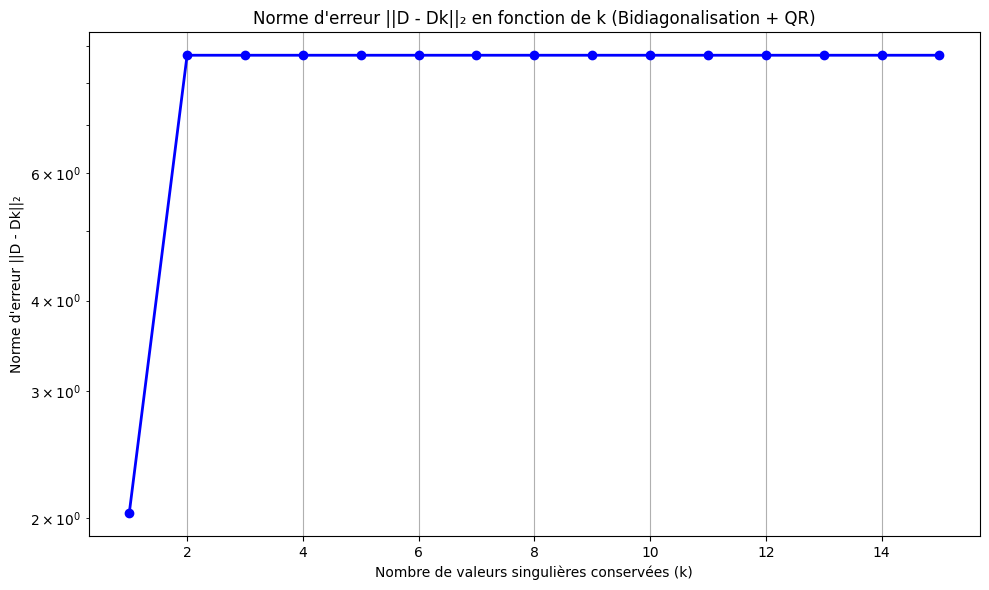

In [103]:
# Matrice aléatoire de test :
#Matrice aléatoire de test : 
np.random.seed(42)
m, n = 20, 15
matrice_alea = np.random.rand(m, n)
    
erreurs = plot_norme_erreur_bidiagonale_qr(matrice_alea , 15)
    